# Breast Cancer - **part 3: Classification**

## **0.** Settings

In [2]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# No warnings (seaborn)
import warnings
warnings.filterwarnings("ignore")

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.ensemble     import AdaBoostClassifier
from xgboost              import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

## **1.** Dataset

In [ ]:
'''

    DATASET INFORMATIONS

    |------------------------|------------|------------------------------------------------------------------|
    | Name                   | Data Type  | Description                                                      |
    |------------------------|------------|------------------------------------------------------------------|
    | id                     | nominal    | ID number                                                        |
    | diagnosis              | nominal    | (target) M = malignant, B = benign                               |
    | radius_mean            | continuous | radius: mean of distances from center to points on the perimeter |
    | texture_mean           | continuous | texture: standard deviation of gray-scale values                 |
    | perimeter_mean         | continuous | perimeter                                                        |
    | area_mean              | continuous | area                                                             |
    | smoothness_mean        | continuous | smoothness: local variation in radius lengths                    |
    | compactness_mean       | continuous | compactness: perimeter^2 / area - 1.0                            |
    | concavity_mean         | continuous | concavity: severity of concave portions of the contour           |
    | concave points_mean    | continuous | concave points: number of concave portions of the contour        |
    | symmetry_mean          | continuous | symmetry                                                         |
    | fractal_dimension_mean | continuous | fractal dimension: coastline approximation - 1                   |
    |------------------------|------------|------------------------------------------------------------------|

'''

In [3]:
# Import the dataset
data = pd.read_csv('./breast.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.columns[1:12]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [6]:
# We'll consider only the 'mean' features
data = data[data.columns[1:12]]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


## **2.** Data preprocessing

In [8]:
# Null elements
data.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [9]:
data.isnull().any()

diagnosis                 False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
dtype: bool

In [10]:
# Encoding of the target:
data['diagnosis'].replace(to_replace=['B', 'M'], value=[0, 1], inplace=True)

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## **3.** Classification

### **3.1.** Classification methods

In [13]:
# Random state (for reproducible results)
random_state = 42

# Data and target definition
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [15]:
# Split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, shuffle=True, random_state=random_state)

# For the ensamble models let's consider:
n_estimators = 50

# Models definition
models = {
    'Ridge Unregularized': LogisticRegression(penalty="l2", C=1e5, max_iter=300, solver="liblinear", random_state=random_state),
    'Ridge':               LogisticRegression(penalty="l2", C=100, max_iter=300, solver="liblinear", random_state=random_state),
    'Lasso':               LogisticRegression(penalty="l1", C=100, max_iter=300, solver="liblinear", random_state=random_state),
    'kNN_5':               KNeighborsClassifier(n_neighbors=5),
    'kNN_100':             KNeighborsClassifier(n_neighbors=100),
    'Decision Tree':       DecisionTreeClassifier(max_depth=None, random_state=random_state),
    'Random Forest':       RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=random_state),
    'Ada Boost':           AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators, random_state=random_state),
    'XGB':                 XGBClassifier(eval_metric='mlogloss', random_state=random_state)
}

### **3.2.** Fitting

In [18]:
# For every model let's collect:
#   * roc_result    : informations used to plot the ROC curves afterwards
#   * accuracy_mean : crossvalidation result (accuracy mean)
#   * accuracy_sd   : crossvalidation result (accuracy standard deviation)
#   * precision
#   * recall
#   * f1
#   * auc

crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

roc_results   = {}
model         = []
accuracy_mean = []
accuracy_std  = []
accuracy_test = []
precision     = []
recall        = []
f1            = []
auc           = []

for model_name in models:

    # Model to evaluate
    current_model = models[model_name];

    # Crossvalidation evaluation
    cv_score = cross_val_score(current_model, x, y, cv=crossvalidation);

    # Accuracy mean and standard deviation
    accuracy_mean.append(np.average(cv_score));
    accuracy_std.append(np.std(cv_score));

    # Model fit
    current_model.fit(x_train, y_train);

    # Deterministic prediction (threshold=0.5) and probabilistic prediction
    y_pred = current_model.predict(x_test);
    y_pred_prob = current_model.predict_proba(x_test);

    # ROC, AUC
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob[:,1], pos_label=1);
    roc_auc = roc_auc_score(y_true=y_test, y_score=y_pred_prob[:,1]);
    auc.append(roc_auc);

    # Store the information to plot the ROC curves afterwards
    roc_results[model_name] = (fpr, tpr, thresholds, roc_auc);

    # Other evaluation metrics
    accuracy_test.append(accuracy_score(y_test, y_pred)); # accuracy
    precision.append(precision_score(y_test, y_pred));    # precision
    recall.append(recall_score(y_test, y_pred));          # recall
    f1.append(f1_score(y_test, y_pred));                  # f1

    model.append(model_name);
    print('Done with', model_name)

Done with Ridge Unregularized
Done with Ridge
Done with Lasso
Done with kNN_5
Done with kNN_100
Done with Decision Tree
Done with Random Forest
Done with Ada Boost
Done with XGB


### **3.3.** Results

In [19]:
# Let's summarize the results
results = {}

results['Model']            = model
results['Accuracy_CV_mean'] = accuracy_mean
results['Accuracy_CV_std']  = accuracy_std
results['Accuracy_test']    = accuracy_test
results['Precision']        = precision
results['Recall']           = recall
results['F1']               = f1

results = pd.DataFrame(data=results)
results

,Model,Accuracy_CV_mean,Accuracy_CV_std,Accuracy_test,Precision,Recall,F1
0,Ridge Unregularized,0.927851,0.036649,0.952632,0.940299,0.926471,0.933333
1,Ridge,0.926222,0.025709,0.952632,0.927536,0.941176,0.934307
2,Lasso,0.933114,0.028513,0.942105,0.913043,0.926471,0.919708
3,kNN_5,0.887500,0.047906,0.905263,0.878788,0.852941,0.865672
4,kNN_100,0.892763,0.022968,0.889474,1.000000,0.691176,0.817391
5,Decision Tree,0.920990,0.029525,0.921053,0.884058,0.897059,0.890511
6,Random Forest,0.938534,0.027401,0.931579,0.910448,0.897059,0.903704
7,Ada Boost,0.945551,0.030801,0.963158,0.955224,0.941176,0.948148
8,XGB,0.943828,0.044907,0.968421,0.930556,0.985294,0.957143


In [41]:
# Best results highlighted
results.set_index('Model').style.highlight_max(color='lightgreen', axis=0)

,Accuracy_CV_mean,Accuracy_CV_std,Accuracy_test,Precision,Recall,F1
Model,,,,,,
Ridge Unregularized,0.927851,0.036649,0.952632,0.940299,0.926471,0.933333
Ridge,0.926222,0.025709,0.952632,0.927536,0.941176,0.934307
Lasso,0.933114,0.028513,0.942105,0.913043,0.926471,0.919708
kNN_5,0.887500,0.047906,0.905263,0.878788,0.852941,0.865672
kNN_100,0.892763,0.022968,0.889474,1.000000,0.691176,0.817391
Decision Tree,0.920990,0.029525,0.921053,0.884058,0.897059,0.890511
Random Forest,0.938534,0.027401,0.931579,0.910448,0.897059,0.903704
Ada Boost,0.945551,0.030801,0.963158,0.955224,0.941176,0.948148
XGB,0.943828,0.044907,0.968421,0.930556,0.985294,0.957143


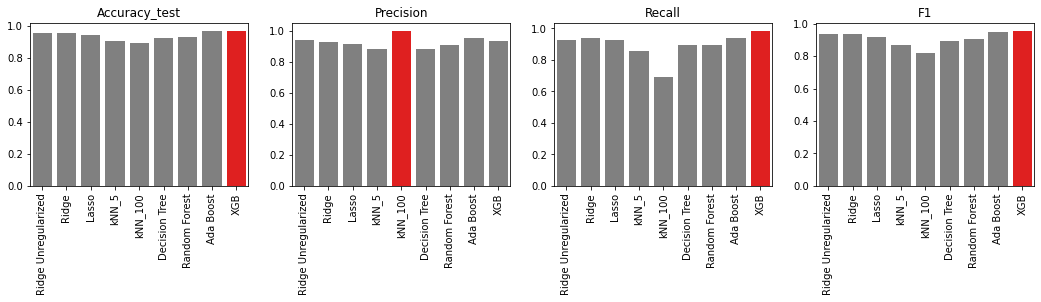

In [50]:
# Let's plot it
plt.figure(figsize=(18,3))

for i in range(0,4):
    plt.subplot(1,4, i+1)
    colors = ['grey' if (x < max(results.iloc[:,3+i])) else 'red' for x in results.iloc[:,3+i]];
    sns.barplot(results['Model'], results.iloc[:,3+i], palette=colors);
    plt.title(results.columns[3+i])
    plt.xticks(rotation=90);
    plt.ylabel(None);
    plt.xlabel(None);

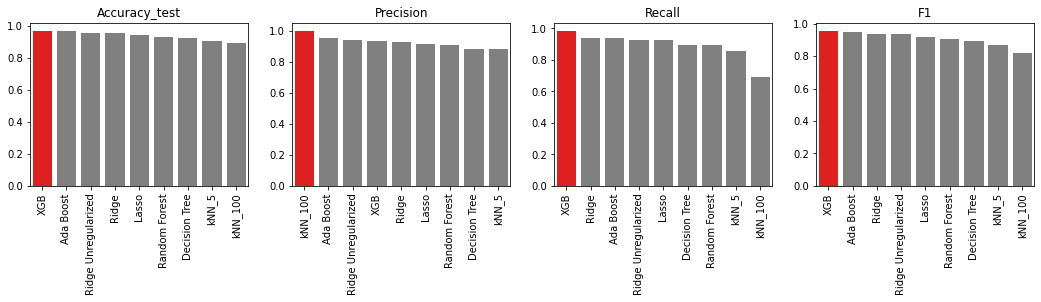

In [51]:
# Let's plot it sorted
plt.figure(figsize=(18,3))

for i in range(0,4):
    plt.subplot(1,4, i+1)
    names  = results['Model'];
    values = results.iloc[:,3+i];
    df     = pd.DataFrame(data=pd.concat([names, values], axis=1))
    df     = df.sort_values(by=df.columns[1], ascending=False)
    colors = ['grey' if (x < max(df.iloc[:,1])) else 'red' for x in df.iloc[:,1]];
    sns.barplot(df.iloc[:,0], df.iloc[:,1], palette=colors);
    plt.title(results.columns[3+i])
    plt.xticks(rotation=90);
    plt.ylabel(None);
    plt.xlabel(None);

### **3.4.** ROC

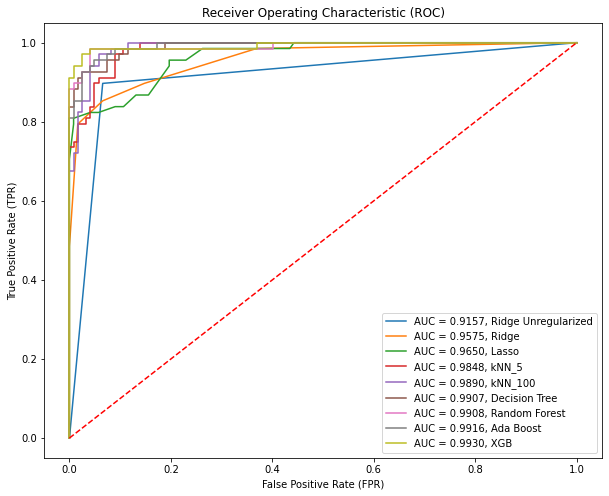

In [57]:
# ROC_results
# For every method there are : fpr, tpr, thresholds, roc_auc
pd.DataFrame(data=roc_results)

# For convenience, let's transpose them (to sort them)
roc_info = pd.DataFrame(data=roc_results).T
roc_info.columns = ['fpr', 'tpr', 'tresholds', 'roc_auc']

# Let's sort them based on AUC (to simplify the plot)
roc_info = roc_info.sort_values(by=['roc_auc'], ascending=True)

# Plot
plt.figure(figsize=(10,8))
for i in range(0,len(models)):
    plt.plot(roc_info.iloc[i,0], roc_info.iloc[i,1], label='AUC = %.4f, %s' %(roc_info.iloc[i,3],model[i]));
plt.title('Receiver Operating Characteristic (ROC)');
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.ylabel('True Positive Rate (TPR)');
plt.xlabel('False Positive Rate (FPR)');